# Big Data Intelligence Assignment 1

In [223]:
import pandas as pd

df = pd.read_excel('data.xlsx')
categories = ['Online Game', 'School Alumni', 'House & living', 'Stock Market', 'Organization and Industry']
df['Group category'] = df['Group category'].replace({i+1: categories[i] for i in range(len(categories))})

## 1. One-Way ANOVA

Let's do the one-way ANOVA test for col[7] with the categories of col[2]

1) Group and visualize the data
2) Verify the Assumptions (Shapiro-Wilk, Levene)
3) Compute and display the ANOVA Table
4) Kruskal Wallis H test

Descriptive statistics:
                          Average year                                  \
                                 count       mean       std        min   
Group category                                                           
House & living                   196.0  30.791534  2.552901  22.700000   
Online Game                      484.0  23.404278  4.923757  13.097826   
Organization and Industry        635.0  28.545081  3.018979  14.650000   
School Alumni                    300.0  29.618193  5.217371  15.752577   
Stock Market                     425.0  26.255318  5.098256  14.084746   

                                                                       
                                 25%        50%        75%        max  
Group category                                                         
House & living             29.087157  30.679062  32.398919  37.815789  
Online Game                19.781818  23.010230  26.682932  40.077778  
Organization and Indust

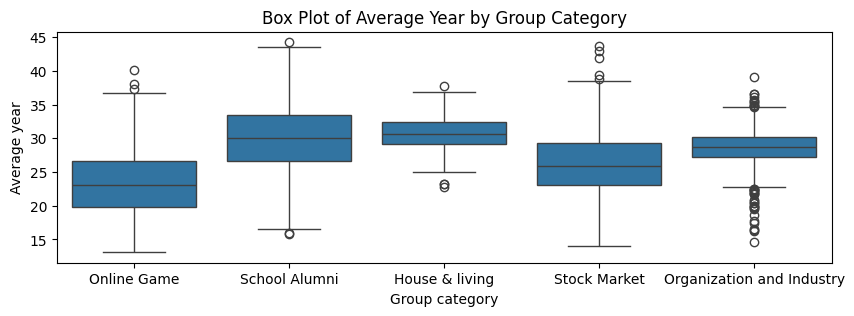

Normality test for each group:
Online Game: p-value = 0.0010, not normal
School Alumni: p-value = 0.0069, not normal
House & living: p-value = 0.1558, normal
Stock Market: p-value = 0.0001, not normal
Organization and Industry: p-value = 0.0000, not normal

Homogeneity of variance test:
p-value = 9.677355333795493e-49, not homogeneous 

ANOVA Table:
Source          SS              df         MS              F          p-value   
Between         12782.92        4          3195.73         171.51     1.0820916064752822e-126
Within          37918.62        2035       18.63          
Total           50701.54        2039       

Kruskal-Wallis H test:
H-stat = 544.1032487615745, p-value = 1.9307475974891137e-116, not equal medians


In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

average_age = df[['Group category', 'Average year']]

# descriptive statistics
print('Descriptive statistics:')
print(average_age.groupby('Group category').describe(), '\n')

# visualize the data
plt.figure(figsize=(10, 3))
sns.boxplot(x='Group category', y='Average year', data=average_age)
plt.title('Box Plot of Average Year by Group Category')
plt.xlabel('Group category')
plt.ylabel('Average year')
plt.show()

# ANOVA assumptions check
print('Normality test for each group:')
for category in categories:
    stat, p = stats.shapiro(average_age[average_age['Group category'] == category]['Average year'])
    print(f'{category}: p-value = {p:.4f}, {"not " if p < 0.05 else ""}normal')
    
print('\nHomogeneity of variance test:')
stat, p = stats.levene(*[average_age[average_age['Group category'] == category]['Average year'] for category in categories])
print(f'p-value = {p}, {"not " if p < 0.05 else ""}homogeneous', "\n")

# ANOVA table
N = average_age['Average year'].count()
k = len(categories)
overall_mean = average_age['Average year'].mean()

ages_per_category = [np.array(group) for group in average_age.groupby('Group category')['Average year'].apply(list)]
SS_between = sum([len(group) * (group.mean() - overall_mean)**2 for group in ages_per_category])
SS_within = sum([sum((group - group.mean())**2) for group in ages_per_category])
SS_total = SS_between + SS_within

df_between = k - 1
df_within = N - k
df_total = N - 1
MS_between = SS_between / df_between
MS_within = SS_within / df_within

F_stat = MS_between / MS_within
p_value = stats.f.sf(F_stat, df_between, df_within)


print('ANOVA Table:')
print(f"{'Source':<15} {'SS':<15} {'df':<10} {'MS':<15} {'F':<10} {'p-value':<10}")
print(f"{'Between':<15} {SS_between:<15.2f} {df_between:<10} {MS_between:<15.2f} {F_stat:<10.2f} {p_value}")
print(f"{'Within':<15} {SS_within:<15.2f} {df_within:<10} {MS_within:<15.2f}")
print(f"{'Total':<15} {SS_total:<15.2f} {df_total:<10}", "\n")

# Kruskal Wallis H test
print('Kruskal-Wallis H test:')
stat, p = stats.kruskal(*ages_per_category)
print(f'H-stat = {stat}, p-value = {p}, {"not " if p < 0.05 else ""}equal medians')



## 2. Regression Problems

Let's solve the different regression problems

### a. Problem 1 : Simple Linear Regression

1) Data filtering
2) Linear Regressions for the 3 labels
3) Linear functions and errors
4) Correlations calculus
5) Results plotting

       No-response ratio  Night-chat ratio  Picture ratio
count        1247.000000       1247.000000    1247.000000
mean            0.639985          0.140707       0.029526
std             0.210147          0.126742       0.046181
min             0.067227          0.000000       0.000000
25%             0.477869          0.042553       0.002122
50%             0.636364          0.114368       0.013916
75%             0.821731          0.200299       0.035315
max             1.000000          0.828125       0.516129 

Results for No-response ratio:
    Linear function: y = 0.0129 * x + 0.29
    RMSE = 0.1997
    MSE = 0.0399
    Correlation coefficient = 0.3105



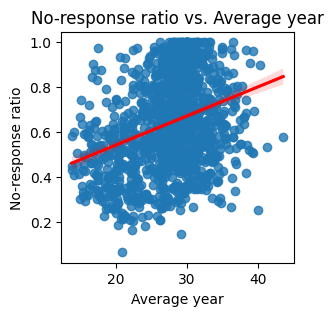

Results for Night-chat ratio:
    Linear function: y = -0.0091 * x + 0.39
    RMSE = 0.1181
    MSE = 0.0139
    Correlation coefficient = -0.3628



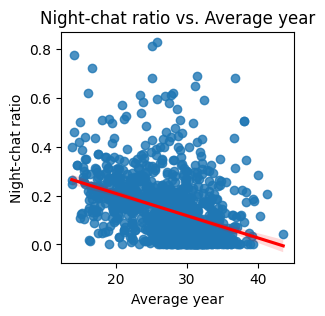

Results for Picture ratio:
    Linear function: y = -0.0007 * x + 0.05
    RMSE = 0.0460
    MSE = 0.0021
    Correlation coefficient = -0.0713



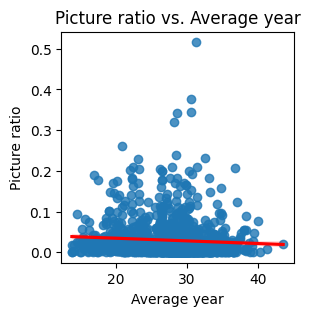

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr

# filter out the data
labels = ['No-response ratio', 'Night-chat ratio', 'Picture ratio']
df_filtered = df[df['Session number'] >= 20]
print(df_filtered[labels].describe(), '\n')

# perform a linear regressions by predicting the 3 labels using the average age
X = df_filtered[['Average year']]

for label in labels:
    y = df_filtered[[label]]
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    w1 = model.coef_[0][0]
    w0 = model.intercept_[0]
    rmse = root_mean_squared_error(y, y_pred)
    corr, _ = pearsonr(df_filtered['Average year'], df_filtered[label])
    
    # display the result of the linear regression
    print(f'Results for {label}:')
    print(f'    Linear function: y = {w1:.4f} * x + {w0:.2f}')
    print(f'    RMSE = {rmse:.4f}')
    print(f'    MSE = {rmse**2:.4f}')
    print(f'    Correlation coefficient = {corr:.4f}')
    print()
    
    # plot the result for the label
    plt.figure(figsize=(3, 3))
    sns.regplot(x='Average year', y=label, data=df_filtered, line_kws={'color': 'red'})
    plt.title(f'{label} vs. Average year')
    plt.xlabel('Average year')
    plt.ylabel(label)
    plt.show()


### b. Problem 2 : Weighted Multivariate Linear Regression

1) Data Preparation
2) Weighted Multivariate Linear Regression for the 3 labels
3) Linear functions and errors

In [226]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Data preparation
labels = ['No-response ratio', 'Night-chat ratio', 'Picture ratio']
weights = df['Session number']
X = df.iloc[:, 2:11]

# Linear regressions
for label in labels:
    y = df[[label]]
    model = LinearRegression()
    model.fit(X, y, sample_weight=weights)
    
    y_pred = model.predict(X)
    r2_score = model.score(X, y, sample_weight=weights)
    w = [model.intercept_[0]] + model.coef_[0]
    rmse = root_mean_squared_error(y, y_pred, sample_weight=weights)
    lin_func = f'y = {w[0]:.2f} + ' + ' + '.join([f'{w[i]:.2f} * x{i}' for i in range(1, len(w))])
    
    # display the results
    print(f'Results for {label}:')
    print(f'    Linear function: {lin_func}')
    print(f'    RMSE = {rmse:.4f}')
    print(f'    MSE = {rmse**2:.4f}')
    print(f'    R^2 score = {r2_score:.4f}')
    print()  
    
    


Results for No-response ratio:
    Linear function: y = 0.63 + 0.63 * x1 + 0.48 * x2 + 0.67 * x3 + 0.63 * x4 + 0.63 * x5 + 0.61 * x6 + 0.40 * x7 + 0.63 * x8
    RMSE = 0.1439
    MSE = 0.0207
    R^2 score = 0.5218

Results for Night-chat ratio:
    Linear function: y = 0.27 + 0.27 * x1 + 0.32 * x2 + 0.30 * x3 + 0.26 * x4 + 0.28 * x5 + 0.22 * x6 + 0.40 * x7 + 0.27 * x8
    RMSE = 0.0877
    MSE = 0.0077
    R^2 score = 0.3011

Results for Picture ratio:
    Linear function: y = 0.04 + 0.04 * x1 + 0.04 * x2 + 0.06 * x3 + 0.04 * x4 + 0.04 * x5 + 0.03 * x6 + 0.03 * x7 + 0.04 * x8
    RMSE = 0.0464
    MSE = 0.0022
    R^2 score = 0.1037



### c. Problem 3 : Classification

1) Data Preparation
2) Binary classification
3) Feature selection
4) Multi-class classification

Binary Classification:
Precision: 0.83                      Accuracy:  0.80
Recall:    0.81                      F1-score:  0.82



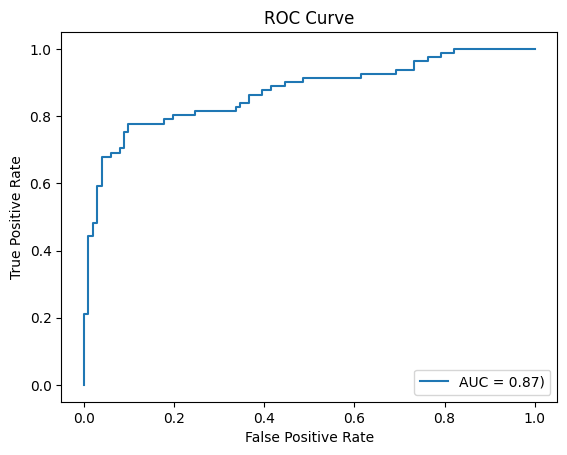

Feature Importance (Coefficient and Odds Ratio):
                   Feature   Coefficient  Odds Ratio
6   Regional concentration  6.226856e-01    1.863927
2                  Density  2.733855e-01    1.314407
7             Mobile ratio  1.410082e-01    1.151434
4             Average year  1.206286e-01    1.128206
11           Picture ratio  1.698612e-02    1.017131
1           Message number  4.223389e-07    1.000000
0               Group size -2.764243e-03    0.997240
8           Session number -3.765818e-03    0.996241
10        Night-chat ratio -5.569844e-02    0.945824
9        No-response ratio -3.594717e-01    0.698045
3                Sex ratio -4.886590e-01    0.613448
5                  Age gap -4.985125e-01    0.607434

Optimal number of features: 10
Selected features: ['Density', 'Sex ratio', 'Average year', 'Age gap', 'Regional concentration', 'Mobile ratio', 'Session number', 'No-response ratio', 'Night-chat ratio', 'Picture ratio']
Precision: 0.90                      Accu

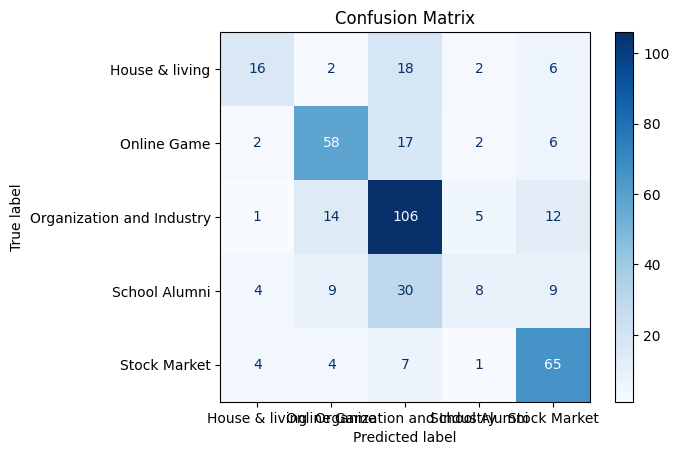

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_display_results(y_val, y_pred, average='binary'):
    pos_label = 'Online Game' if average == 'binary' else None
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average=average, pos_label=pos_label)
    recall = recall_score(y_val, y_pred, average=average, pos_label=pos_label)
    f1 = f1_score(y_val, y_pred, average=average, pos_label=pos_label)

    print(f"{'Precision:':<10} {precision:<25.2f} {'Accuracy:':<10} {accuracy:<.2f}")
    print(f"{'Recall:':<10} {recall:<25.2f} {'F1-score:':<10} {f1:<.2f}")
    print()

# Data preparation
df_filtered = df[df['Group category'].isin(['Online Game', 'Stock Market'])]
X = df_filtered.iloc[:, 2:] # all features
y = df_filtered['Group category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=237)

# Logistic regression for binary classification
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Binary Classification:")
evaluate_and_display_results(y_val, y_pred)

# ROC curve
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1], pos_label='Stock Market') # put the curve over the diagonal
plt.plot(fpr, tpr, label=f"AUC = {np.trapz(tpr, fpr):.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature selection
# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})
print("Feature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))
print()

# Recursive Feature Elimination (RFE)
n, f1, feats = 0, 0, []
for i in range(len(X.columns)-1, 1, -1):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred_rfe = rfe.predict(X_val)
    s = f1_score(y_val, y_pred_rfe, pos_label='Online Game')
    if s > f1:
        n, f1, y_pred, feats = i, s, y_pred_rfe, X.columns[rfe.support_].tolist()
print(f"Optimal number of features: {n}")
print(f"Selected features: {feats}")
evaluate_and_display_results(y_val, y_pred)

# Multiclass classification
X = df.iloc[:, 2:] # all features
y = df['Group category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=237)
multi_model = LogisticRegression(solver='liblinear')
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_val)
print("Multiclass Classification:")
evaluate_and_display_results(y_val, y_pred, average='weighted')
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=multi_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## 3. Sampling

The goal of the last problem is to compare 3 sampling methods. We are going to compare a reservoir sampling, a simple random sampling and a Stratified random sampling. For each sampling method, we are going to :

1) sample the data
2) perform the same regression as in 2-a. 10 times (we are doing the one for no-response ratio)
3) compute the mean and variance of w0 and w1

Simple Random Sampling:
w0 mean: 0.31149606881345526, w0 variance: 0.0045239030534512765
w1 mean: 0.01199038071546973, w1 variance: 6.91701511205607e-06


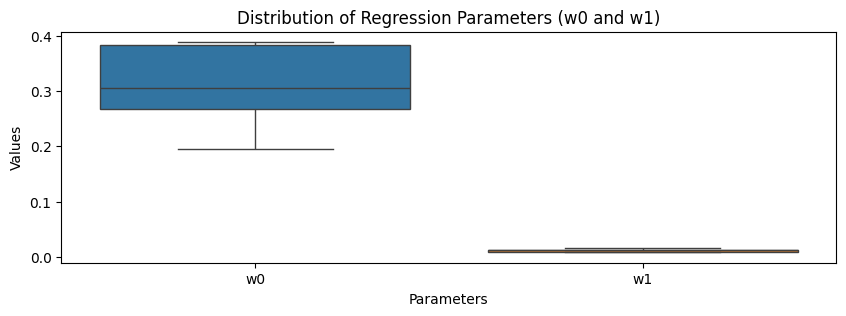

Stratified Random Sampling:
w0 mean: 0.23115509465452494, w0 variance: 0.006418693522702687
w1 mean: 0.014735374822868843, w1 variance: 8.513106799323472e-06


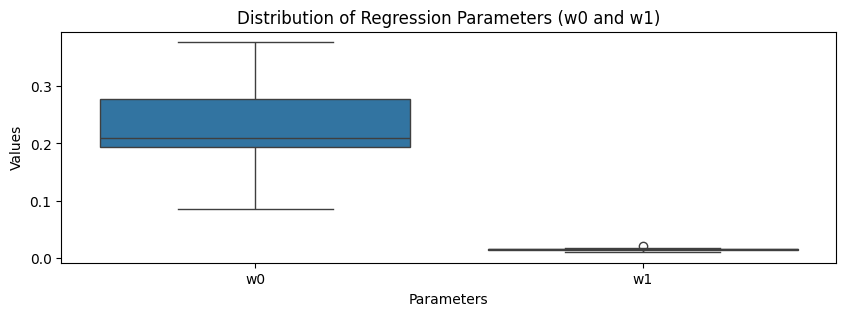

Reservoir Sampling:
w0 mean: 0.27241607762654474, w0 variance: 0.00569475813429538
w1 mean: 0.01353666587601465, w1 variance: 7.081634583081915e-06


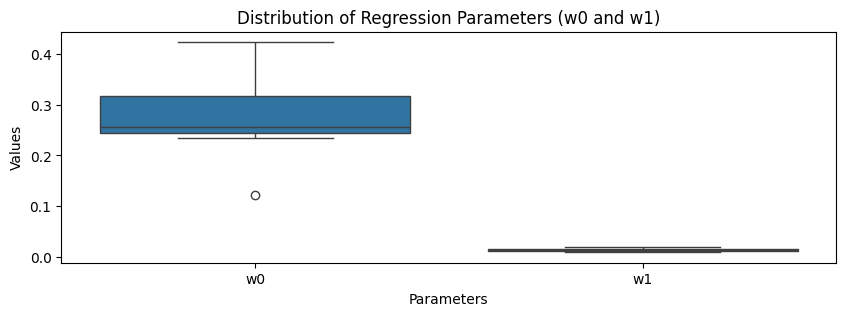

In [228]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

df_filtered = df[df['Session number'] >= 20] # only consider the data with session number >= 20

def simple_random_sampling():
    df_shuffled = df_filtered.sample(frac=0.1)
    X, y = df_shuffled[['Average year']], df_shuffled[['No-response ratio']]
    return X, y

def stratified_random_sampling():
    df_stratified = df_filtered.groupby('Group category', group_keys=False).apply(lambda x: x.sample(frac=0.1), include_groups=False)
    X, y = df_stratified[['Average year']], df_stratified[['No-response ratio']]
    return X, y

def reservoir_sampling():
    reservoir = []
    n = len(df_filtered)
    k = int(n * 0.1)
    
    for i in range(k):
        reservoir.append(df_filtered.iloc[i])
    
    for i in range(k, n):
        j = random.randint(0, i)
        if j < k:
            reservoir[j] = df_filtered.iloc[i]
            
    reservoir_df = pd.DataFrame(reservoir)
    X, y = reservoir_df[['Average year']], reservoir_df[['No-response ratio']]
    return X, y

def linear_regressions_and_results(sampling_method):
    w0_list, w1_list = [], []
    
    for _ in range(10):
        X, y = sampling_method()
        model = LinearRegression()
        model.fit(X, y)
        w0_list.append(model.intercept_[0])
        w1_list.append(model.coef_[0][0])
    
    w0_mean, w0_var = np.mean(w0_list), np.var(w0_list)
    w1_mean, w1_var = np.mean(w1_list), np.var(w1_list)
    
    print(f"w0 mean: {w0_mean}, w0 variance: {w0_var}")
    print(f"w1 mean: {w1_mean}, w1 variance: {w1_var}")
    
    df_params = pd.DataFrame({
        'w0': w0_list,
        'w1': w1_list
    })
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=df_params)
    plt.title("Distribution of Regression Parameters (w0 and w1)")
    plt.ylabel("Values")
    plt.xlabel("Parameters")
    plt.show()

print("Simple Random Sampling:")
linear_regressions_and_results(simple_random_sampling)

print("Stratified Random Sampling:")
linear_regressions_and_results(stratified_random_sampling)

print("Reservoir Sampling:")
linear_regressions_and_results(reservoir_sampling)

